# Projet ML : Prédiction de la taille des tumeurs de mélanome

**Problématique du dataset étudié :**\
Le but de cette étude est de prédire la taille des tumeurs de mélanome en se basant sur divers attributs. Les mélanomes se présentent sous des formes, des tailles et des couleurs variées, ce qui rend difficile l'établissement d'un ensemble exhaustif de signes d'alerte. Le mélanome, également connu sous le nom de mélanome malin, est un type de cancer de la peau qui se développe à partir des cellules productrices de pigments appelées mélanocytes. 

Lien des données : https://www.kaggle.com/datasets/anmolkumar/machine-hack-melanoma-tumor-size-prediction


## Chargement et exploration des données

Commençons par charger les données mises à disposition via le lien kaggle. On peut y trouver 3 fichiers au format .csv: train.csv, test.csv, et sample_submission.csv.

 - Charger les données 
 - Exploration statistique : trouver si il y'a des valeurs manquantes et les éliminer si besoin, tests d'anova pour déterminer les corrélations entre variables et tumor_size

In [37]:
#Importation des modules
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd

In [38]:
#Chargement des données 

data_train = pd.read_csv('/Users/nada/Regression/train.csv', delimiter=',')
data_train.head()

,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio,tumor_size
0,6930.90,2919.02,0.42116,51.8298,9.888294e+05,109.487,2758.76,72,39.3620,14.103
1,15635.70,4879.36,0.31206,223.5500,2.058426e+06,248.881,5952.53,240,22.0253,2.648
2,10376.20,2613.88,0.25191,127.3370,1.434676e+06,160.093,4635.26,73,29.9963,1.688
3,13093.80,4510.06,0.34444,155.4400,1.812195e+06,173.015,5273.87,32,28.1354,3.796
4,7545.21,2882.36,0.38201,85.1237,1.043918e+06,124.414,3263.35,57,35.0200,18.023


- Exploration des données :\
--> Taille du dataset: 9146\
--> Pour chaque tumeur, on dispose de 9 variables quantitatives (8 de type float et 1 de type integer). 

In [39]:
#Description des données
data_train.info()
print('Attributs:',data_train.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9146 entries, 0 to 9145
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mass_npea       9146 non-null   float64
 1   size_npear      9146 non-null   float64
 2   malign_ratio    9146 non-null   float64
 3   damage_size     9146 non-null   float64
 4   exposed_area    9146 non-null   float64
 5   std_dev_malign  9146 non-null   float64
 6   err_malign      9146 non-null   float64
 7   malign_penalty  9146 non-null   int64  
 8   damage_ratio    9146 non-null   float64
 9   tumor_size      9146 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 714.7 KB
Attributs: Index(['mass_npea', 'size_npear', 'malign_ratio', 'damage_size',
       'exposed_area', 'std_dev_malign', 'err_malign', 'malign_penalty',
       'damage_ratio', 'tumor_size'],
      dtype='object')


- Création de X_train, y_train, X_test et y_test: 

In [40]:
X_train = data_train.drop(columns=['tumor_size'])
X_train.head()


,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio
0,6930.90,2919.02,0.42116,51.8298,9.888294e+05,109.487,2758.76,72,39.3620
1,15635.70,4879.36,0.31206,223.5500,2.058426e+06,248.881,5952.53,240,22.0253
2,10376.20,2613.88,0.25191,127.3370,1.434676e+06,160.093,4635.26,73,29.9963
3,13093.80,4510.06,0.34444,155.4400,1.812195e+06,173.015,5273.87,32,28.1354
4,7545.21,2882.36,0.38201,85.1237,1.043918e+06,124.414,3263.35,57,35.0200


In [41]:
y_train = data_train.loc[:,['tumor_size']]
y_train.head()

,tumor_size
0,14.103
1,2.648
2,1.688
3,3.796
4,18.023


In [42]:
X_test = pd.read_csv('test.csv')
X_test.head()


,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio
0,4946.44,914.06,0.18479,54.5566,6.628345e+05,67.0525,2301.76,22,41.9554
1,5613.85,1629.12,0.29019,51.5524,7.842271e+05,80.1986,3235.00,48,40.7410
2,12421.10,3062.41,0.24654,154.1560,1.763575e+06,186.8590,4684.63,63,29.4778
3,6830.77,2457.66,0.35979,56.8995,9.296623e+05,92.7361,3211.93,42,38.5027
4,33407.80,12353.60,0.36978,219.0740,4.595871e+06,493.3370,13389.36,187,26.8449


In [43]:
y_test = pd.read_csv('sample_submission.csv')
y_test.head()

,tumor_size
0,3.418762
1,7.348026
2,3.096391
3,10.489805
4,27.416072


- Valeurs manquantes ou nulles:

In [44]:
data_train.isnull().sum()

mass_npea         0
size_npear        0
malign_ratio      0
damage_size       0
exposed_area      0
std_dev_malign    0
err_malign        0
malign_penalty    0
damage_ratio      0
tumor_size        0
dtype: int64

Il n'y a aucune valeur manquante. Regardons maintenant si il y'a des valeurs incohérentes, en recherchant les lignes où il y'a un 0. 

In [45]:
#afficher les lignes où il y'a un zéro
lignes_avec_zeros = data_train[data_train.eq(0).any(axis=1)]
print("Les lignes contenant un 0 sont: \n",lignes_avec_zeros)
print("Nombre de lignes contenant un 0:", len(lignes_avec_zeros))

colonnes_avec_zeros = data_train.columns[data_train.eq(0).any()]
print("Les colonnes contenant un 0 sont: \n",colonnes_avec_zeros)

Les lignes contenant un 0 sont: 
       mass_npea  size_npear  malign_ratio  damage_size  exposed_area  \
96      8993.44     3126.25       0.34761      90.1403  1.271112e+06   
113     6185.42     1394.40       0.22543      66.8706  8.215469e+05   
117     3473.80     1184.87       0.34108      27.3092  4.752986e+05   
211    19155.90     4961.06       0.25898     226.0460  2.627052e+06   
333    12047.30     2858.21       0.23724     145.5430  1.715849e+06   
701     6387.60     1762.43       0.27591      35.8124  8.682936e+05   
770    12796.60     2887.59       0.22565     160.7500  1.795759e+06   
949     8311.31     2211.76       0.26611      77.0341  1.139238e+06   
1072    9061.49     1926.35       0.21258      94.2186  1.278207e+06   
1083    6355.88     1751.00       0.27549      68.1871  8.499504e+05   
1207    4574.16      920.47       0.20123      41.1086  6.539223e+05   
1307    8396.52     1872.11       0.22296      76.7535  1.185871e+06   
1438    6108.28     2004.75   

In [46]:
#Exemple de ligne avec un zéro.
print(data_train.loc[949,:])

mass_npea         8.311310e+03
size_npear        2.211760e+03
malign_ratio      2.661100e-01
damage_size       7.703410e+01
exposed_area      1.139238e+06
std_dev_malign    9.202030e+01
err_malign        3.460370e+03
malign_penalty    3.300000e+01
damage_ratio      3.684210e+01
tumor_size        0.000000e+00
Name: 949, dtype: float64


On a décidé de ne pas supprimer les lignes où il y'a un zéro, car il n'est spécifié nul part que ce sont des fausses valeurs. De plus, cela ne représente que 58 lignes sur 9146.
Cependant, cela reste incohérent: on peut voir que le damage_size n'est pas nul pour les lignes où tumor_size est nul. 

**Calcul de corrélation**\
On a 9 variables : mass_npea, size_npear, malign_ratio, damage_size, exposed_area, std_dev_malign, err_malign, malign_penalty, damage_ratio. Le but ici est de calculer leur corrélation avec tumor_size.

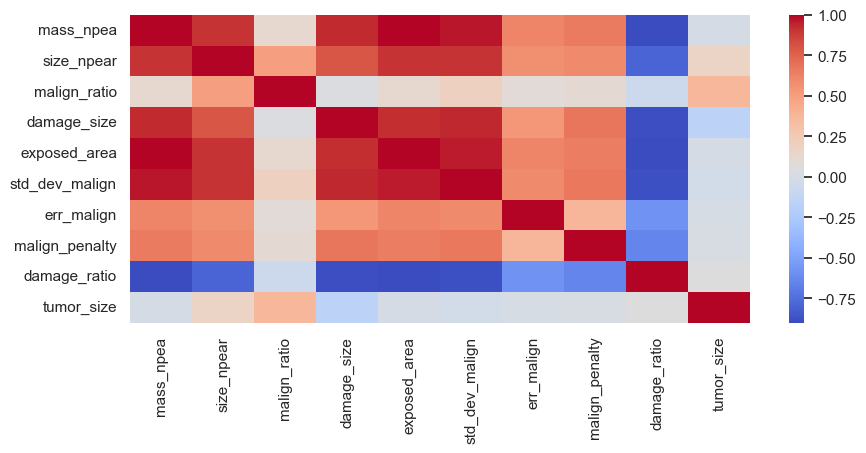

In [47]:
import seaborn as sns

sns.set(rc={'figure.figsize':(10,4)})

train_corr = data_train.corr()

matrice = sns.heatmap(train_corr, xticklabels = train_corr.columns , 
                 yticklabels = train_corr.columns, cmap = 'coolwarm')

La phase exploratoire est intéressante pour visualiser les attributs mais on ne peut rien conclure de cette matrice. On voit qu'il y'a une forte corréalation entre les 6 premiers attributs, ce qui paraît cohérent. On voit cependant que tumor_size n'est corrélé qu'aux attributs size_npear, malign_ratio, et damage_size. Mais ces derniers étant liés aux autres attributs,  cela ne permet pas d'affirmer que seuls size_npear, malign_ratio, et damage_size influent sur tumor_size. 


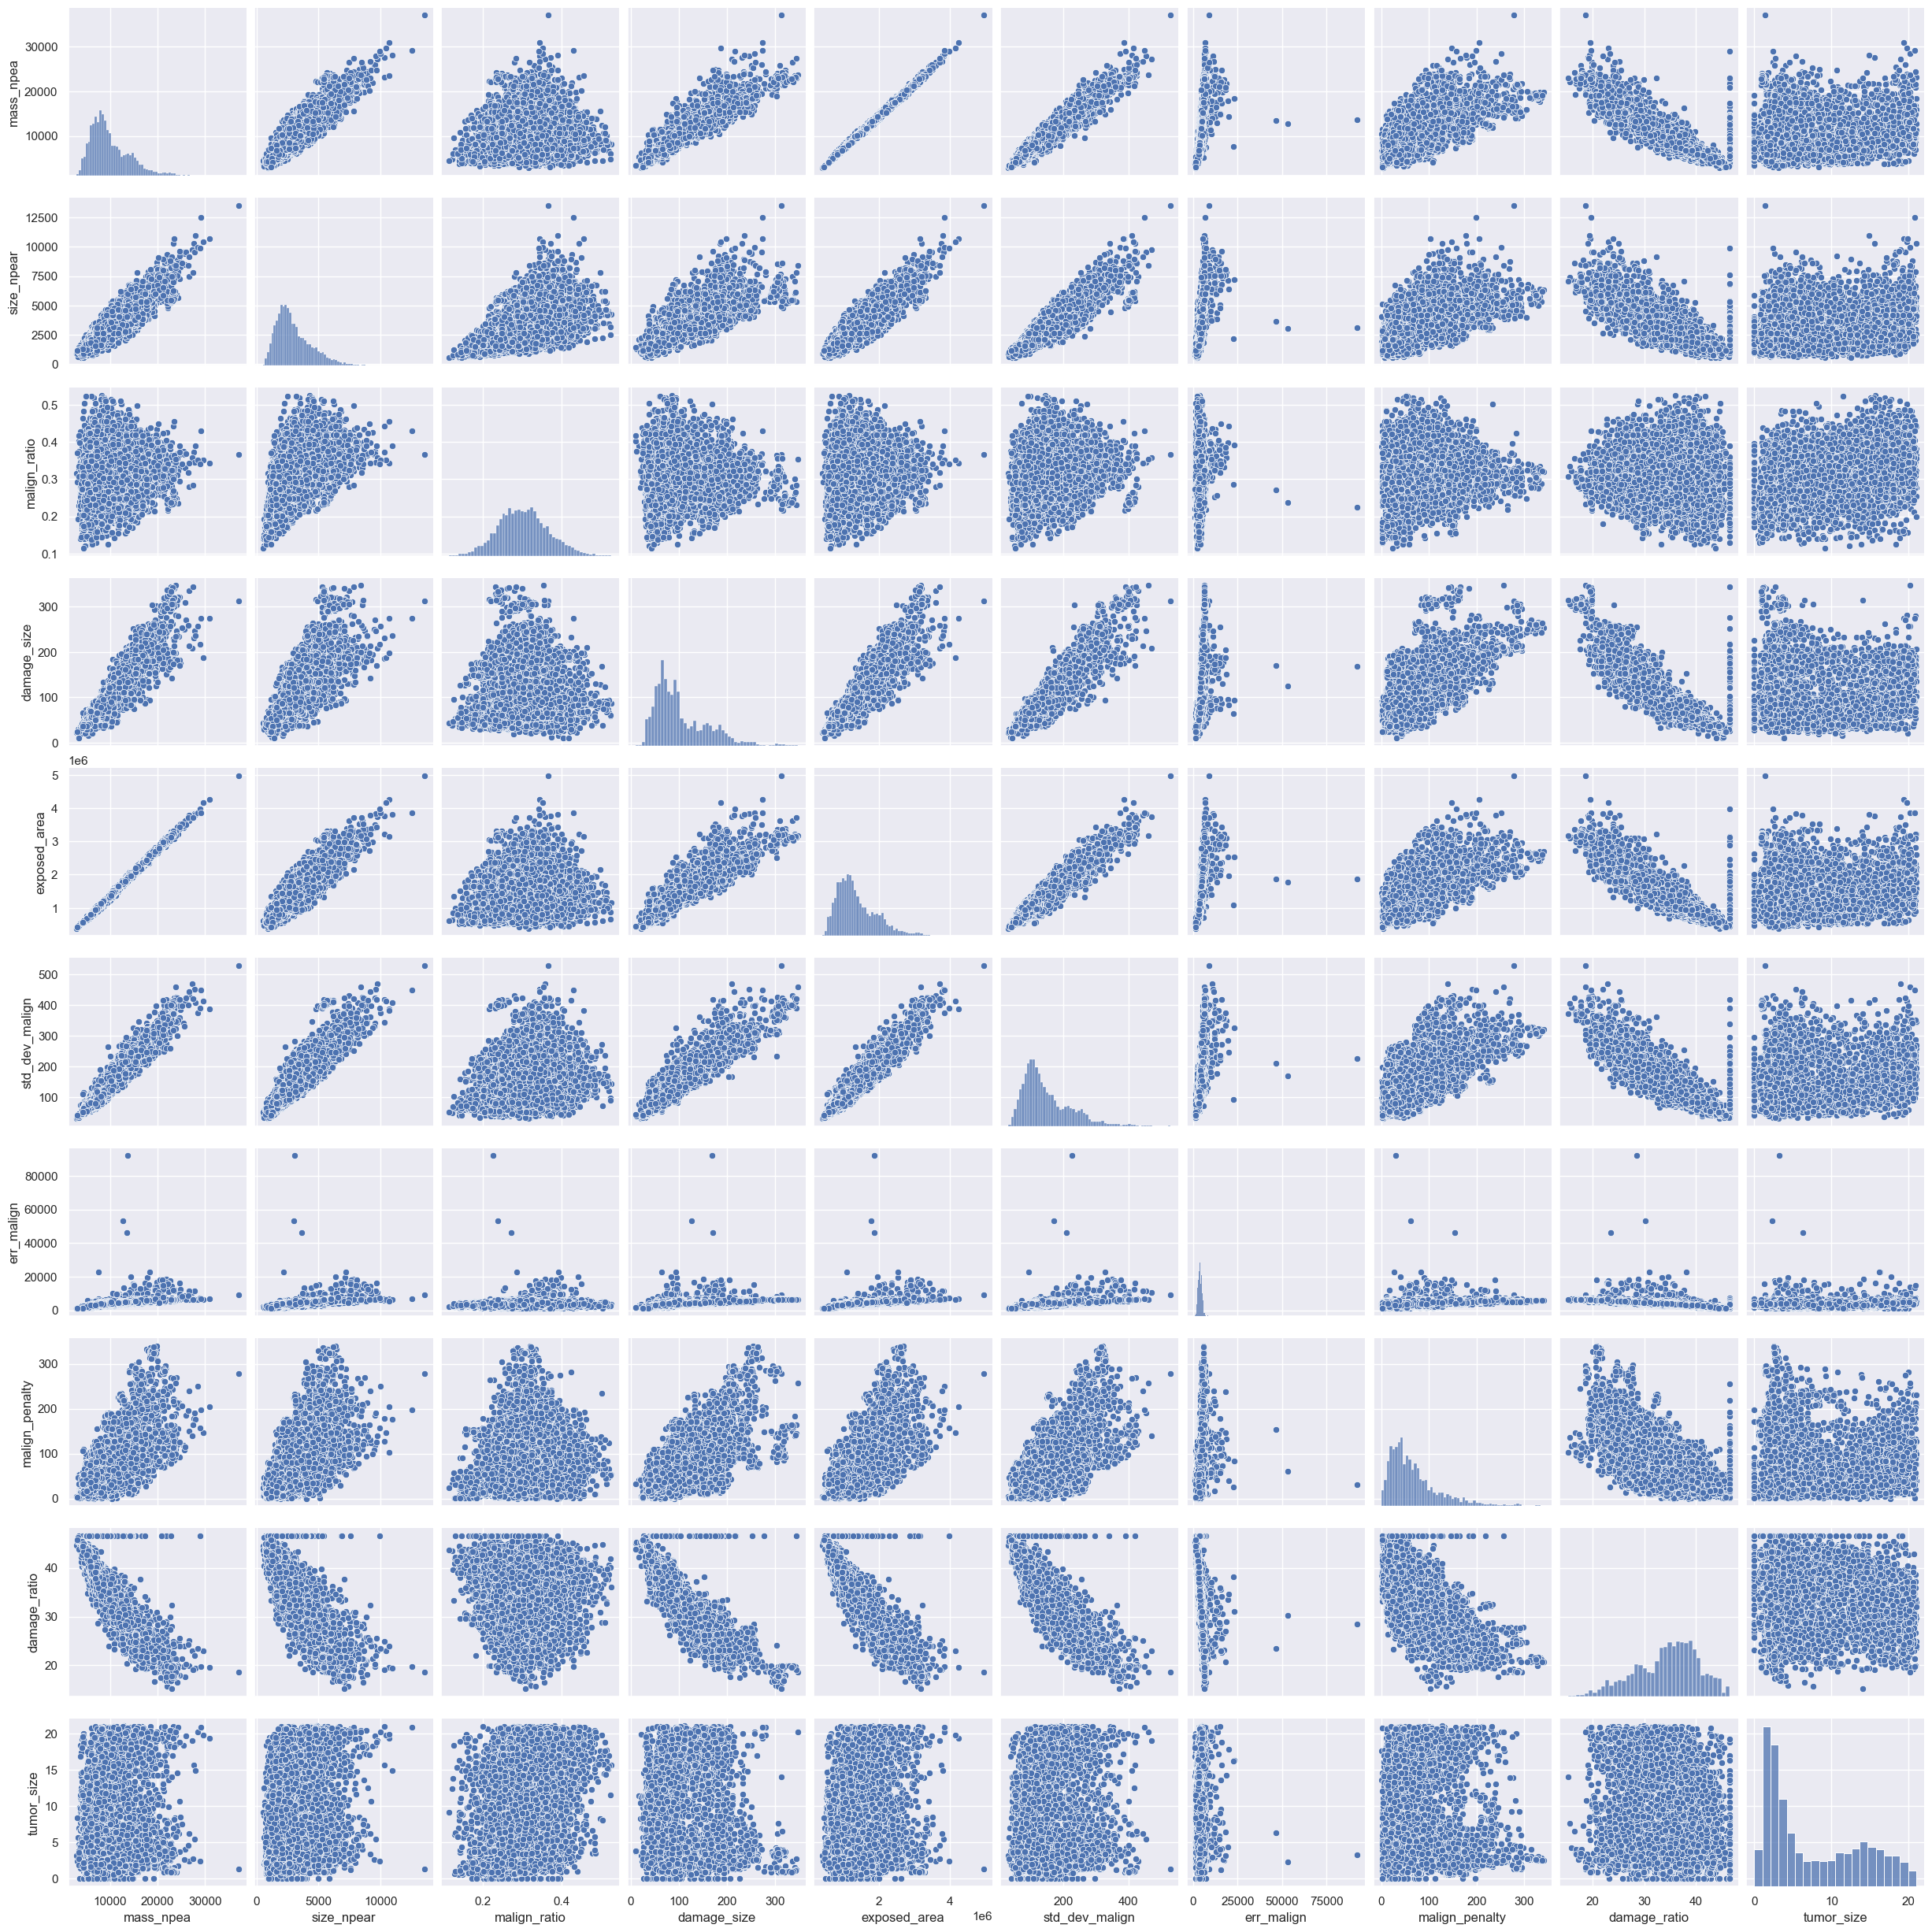

In [48]:
#Autre façon de visualiser la corrélation entre les variables
sns.pairplot(
    data_train,
    vars=data_train.columns
)

## Construction des modèles de prédiction

Nous avons choisi de tester la performance de 8 modèles:
- Régression linéaire
- Random Forest
- Regression Lasso
- Regression polynomiale
- Ada Boost
- Bagging
- XG Boost
- SVR
- Neural Network simple à 1 couche cachée

**Prétraitement : normalisation des données X_train et X_test.**
Nous avons choisi de normaliser les données avec StandardScaler, vu l'hétérogeneité des valeurs.

In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

On choisit ici de faire une validation croisée qui nous permettra de choisir les deux meilleurs modèles. Pour chaque modèle, un score sera calculé à partir de la moyenne des scores issus de la validation croisée. Le score moyen de chaque modèle sera alors stocké dans le dictionnaire performances.

In [50]:
#Importation de cross_val_score
from sklearn.model_selection import cross_val_score

#Création du dictionnaire
performances={}

***Modèle 1 : Régression linéaire***

In [51]:
from sklearn.linear_model import LinearRegression

reg_lin = LinearRegression()
score = cross_val_score(reg_lin, X_train, y_train)
print("Performance moyenne du modèle:",score.mean())

#Stockage dans le dictionnaire
performances["reg_lin"]=score.mean()


Performance moyenne du modèle: 0.2861359187168361


***Modèle 2 : Random Forest***

In [52]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor()
score = cross_val_score(random_forest, X_train, y_train)
print("Performance moyenne du modèle:", score.mean())

#Stockage dans le dictionnaire
performances["reg_lin"]=score.mean()

/Users/nada/miniconda3/envs/general/lib/python3.12/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


/Users/nada/miniconda3/envs/general/lib/python3.12/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/nada/miniconda3/envs/general/lib/python3.12/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/nada/miniconda3/envs/general/lib/python3.12/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/nada/miniconda3/envs/general/lib/python3.12/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y wa

Performance moyenne du modèle: 0.5535295593037524


***Modèle 3: Régression Lasso***

In [53]:
from sklearn import linear_model
reg_lasso = linear_model.Lasso()
score = cross_val_score(reg_lasso, X_train, y_train)
print("Performance du modèle:", score.mean())

#Stockage dans le dictionnaire
performances["reg_lasso"]=score.mean()

Performance du modèle: 0.1142502693038844


***Modèle 4: Régression polynomiale***

In [54]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

#specify degree of 3 for polynomial regression model
#include bias=False means don't force y-intercept to equal zero
poly = PolynomialFeatures()

#reshape data to work properly with sklearn
poly_features = poly.fit_transform(X_train)

#fit polynomial regression model
reg_poly = LinearRegression()
score = cross_val_score(reg_poly, poly_features, y_train)

# print(poly_reg_model.intercept_, poly_reg_model.coef_)

In [55]:
print("Performance du modèle:",score.mean())

#Stockage dans le dictionnaire
performances["reg_poly"]=score.mean()

Performance du modèle: 0.36785586787671376


***Modèle 5: ADA boost***

In [56]:
from sklearn.ensemble import AdaBoostRegressor
ada_boost = AdaBoostRegressor(random_state=0)
ada_boost.fit(X_train,y_train)
score= cross_val_score(ada_boost,X_train, y_train)
print("Performance du modèle 5:", score.mean())

#Stockage dans le dictionnaire
performances["ada_boost"]=score.mean()

/Users/nada/miniconda3/envs/general/lib/python3.12/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nada/miniconda3/envs/general/lib/python3.12/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nada/miniconda3/envs/general/lib/python3.12/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nada/miniconda3/envs/general/lib/python3.12/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vecto

Performance du modèle 5: 0.12567354291523988


***Modèle 6: Bagging***

In [57]:
from sklearn.ensemble import BaggingRegressor

bagging = BaggingRegressor()
score = cross_val_score(bagging, X_train, y_train)
print("Performance du modèle 6:", score.mean())

#Stockage dans le dictionnaire
performances["bagging"]=score.mean()


/Users/nada/miniconda3/envs/general/lib/python3.12/site-packages/sklearn/ensemble/_bagging.py:509: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/Users/nada/miniconda3/envs/general/lib/python3.12/site-packages/sklearn/ensemble/_bagging.py:509: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/Users/nada/miniconda3/envs/general/lib/python3.12/site-packages/sklearn/ensemble/_bagging.py:509: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/Users/nada/miniconda3/envs/general/lib/python3.12/site-packages/sklearn/ensemble/_bagging.py:509: DataConversionWarning: A col

Performance du modèle 6: 0.5114757479686185


***Modèoe 7 : XG Boost*** 

In [58]:
from sklearn.ensemble import GradientBoostingRegressor

boosting = GradientBoostingRegressor()
score = cross_val_score(boosting, X_train,y_train)
print("Performance du modèle 7:", score.mean())

#Stockage dans le dictionnaire
performances["boosting"]=score.mean()

/Users/nada/miniconda3/envs/general/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nada/miniconda3/envs/general/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nada/miniconda3/envs/general/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nada/miniconda3/envs/general/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when 

Performance du modèle 7: 0.401929317187129


***Modèle 8: SVR***


In [59]:
from sklearn.svm import SVR
svr = SVR(kernel="rbf", epsilon=0.1)
score=cross_val_score(svr, X_train, y_train)
print("Performance du modèle 8:", score.mean())

#Stockage dans le dictionnaire
performances["svr"]=score.mean()


/Users/nada/miniconda3/envs/general/lib/python3.12/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nada/miniconda3/envs/general/lib/python3.12/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nada/miniconda3/envs/general/lib/python3.12/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nada/miniconda3/envs/general/lib/python3.12/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vecto

Performance du modèle 8: 0.33114962225068356


***Modèle 9: Arbre de décision***


In [60]:
from sklearn.tree import DecisionTreeRegressor

decision_tree = DecisionTreeRegressor(random_state=42)

score=cross_val_score(decision_tree, X_train, y_train)
print("Performance du modèle 9:", score.mean())

#Stockage dans le dictionnaire
performances["decision_tree"]=score.mean()

Performance du modèle 9: 0.1349372217595885


***Modèle 10: Neural Network***

In [61]:
import torch
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold

In [62]:
X_torch = torch.tensor(X_train).float()
y_torch = torch.tensor(y_train.values).float()
Xdim = X_torch.size(1)

EPS = 1e-2
EPOCHS=50

#Paramètres du KFold et initialisation de la loss totale
kf = KFold(n_splits=5, shuffle=True, random_state=42)
total_loss = 0
total_R2= 0

for fold, (train_indices, val_indices) in enumerate(kf.split(X_torch)):
    # Diviser les données en ensembles d'entraînement et de validation
    X_train_fold, X_val_fold = X_torch[train_indices], X_torch[val_indices]
    y_train_fold, y_val_fold = y_torch[train_indices], y_torch[val_indices]

    # Initialiser le modèle
    netSeq = torch.nn.Sequential(torch.nn.Linear(Xdim, 5),
                                 torch.nn.Tanh(),
                                 torch.nn.Linear(5, 1))

    mseloss = torch.nn.MSELoss()
    optim = torch.optim.SGD(params=netSeq.parameters(), lr=EPS)

    # Entraîner le modèle
    for epoch in range(EPOCHS):
        output = netSeq(X_train_fold)
        loss = mseloss(output, y_train_fold.view(-1, 1))
        optim.zero_grad()
        loss.backward()
        optim.step()

    # Évaluer le modèle sur l'ensemble de validation
    with torch.no_grad():
        output_val = netSeq(X_val_fold)
        loss_val = mseloss(output_val, y_val_fold.view(-1, 1))
        print(f"Fold {fold + 1}, Loss: {loss_val.item()}, Score R2: {r2_score(y_val_fold, output_val)}")

    total_loss += loss_val.item()
    total_R2+= r2_score(y_val_fold, output_val)

# Afficher la moyenne des pertes sur les plis
loss_moy = total_loss / 5
R2_moy = total_R2 / 5
print(f"Loss moyenne: {loss_moy}")
print(f"Score R2 moyen: {R2_moy}")

#Stockage dans le dictionnaire
performances["netseq"]= R2_moy

Fold 1, Loss: 31.895811080932617, Score R2: 0.13197386241608766
Fold 2, Loss: 30.819530487060547, Score R2: 0.14725847608497178
Fold 3, Loss: 30.622644424438477, Score R2: 0.15845268429729897
Fold 4, Loss: 32.18344497680664, Score R2: 0.16008427955632332
Fold 5, Loss: 31.859760284423828, Score R2: 0.15276202271524808
Loss moyenne: 31.476238250732422
Score R2 moyen: 0.15010626501398597


***Bilan des performances***

In [63]:
sorted_performances = dict(sorted(performances.items(), key=lambda item: item[1]))
print("Modèles classés par ordre de performance croissante: \n",sorted_performances)

Modèles classés par ordre de performance croissante: 
 {'reg_lasso': 0.1142502693038844, 'ada_boost': 0.12567354291523988, 'decision_tree': 0.1349372217595885, 'netseq': 0.15010626501398597, 'svr': 0.33114962225068356, 'reg_poly': 0.36785586787671376, 'boosting': 0.401929317187129, 'bagging': 0.5114757479686185, 'reg_lin': 0.5535295593037524}


## Grid search et hyperparameter tuning

Les deux meilleurs modèles sont donc : *Régression linéaire*, et *Bagging*. Nous allons tenter d'améliorer ces deux modèles en performant une Grid Search. 

**Régression linéaire**

Dans le cas de la régression linéaire, cela n'a pas vraiment de sens de performer une grid search, puisqu'il y'a peu d'hyperparamètres pour ce modèle.

In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingRegressor

In [65]:
# Paramètres
parametres = {'fit_intercept': [True, False]}

#Convertir y_train en array 1D
y_train_1d = y_train.values.ravel()

grid_lin = GridSearchCV(LinearRegression(), param_grid=parametres, verbose=0, refit='r2', n_jobs=-1)

grid_lin.fit(X_train, y_train_1d)
results = grid_lin.cv_results_

In [66]:
grid_lin.best_estimator_

LinearRegression()

La performance finale du modèle est calculée sur les données de test.

In [67]:
#test sur des données jamais vues auparavant
y_pred = grid_lin.predict(X_test)
r2 = r2_score(y_pred=y_pred, y_true=y_test)
print("R2: ", r2)

R2:  1.0


Visualisation des résultats :

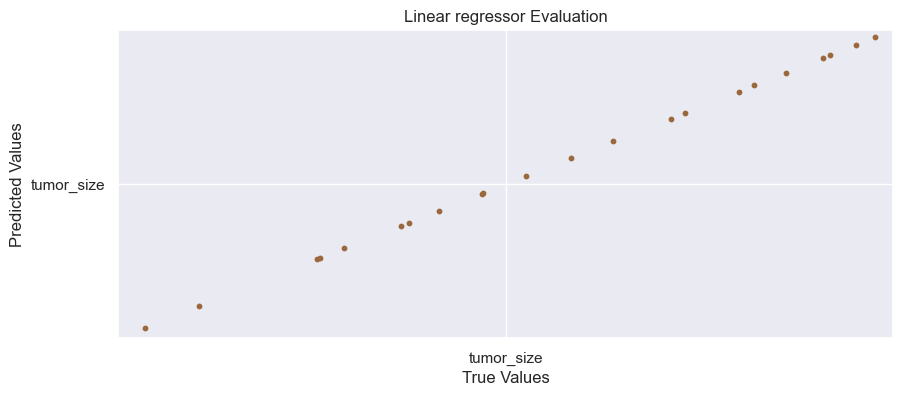

In [68]:
plt.scatter(y_test, y_pred,s=10,color='#9B673C')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Linear regressor Evaluation')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green', linewidth = 4)
plt.show()

**Bagging**

In [75]:
# Paramètres
parametres = {
    'n_estimators': [50, 100, 200, 300],
    'max_samples': [0.6, 0.8, 0.9, 1],
    'max_features': [0.6, 0.8, 0.9, 1]
}
#Convertir y_train en array 1D
y_train_1d = y_train.values.ravel()

grid_bag = GridSearchCV(BaggingRegressor(), param_grid=parametres, verbose=0, refit='r2', n_jobs=-1)

grid_bag.fit(X_train, y_train_1d)
results = grid_bag.cv_results_

In [ ]:
grid_bag.best_estimator_

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

La performance finale du modèle est calculée sur les données de test.

In [ ]:
#test sur des données jamais vues auparavant
y_pred_bag = grid_bag.predict(X_test)
r2 = r2_score(y_pred=y_pred_bag, y_true=y_test)
print("R2: ", r2)

R2:  0.22940185130833857


Visualisation des résultats : 

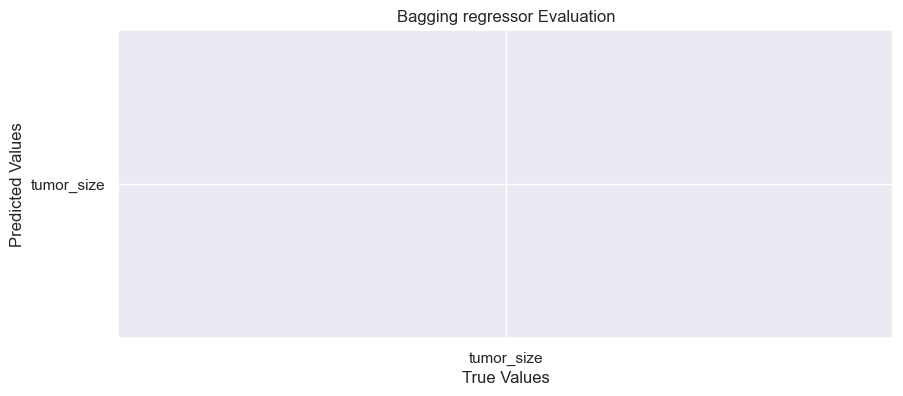

In [ ]:
plt.scatter(y_test, y_pred_bag,s=10,color='#9B673C')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Bagging regressor Evaluation')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green', linewidth = 4)
plt.show()

**Conclusion**: ici la régression linéaire est le modèle le plus performant avec un score R2 de 1, ce qui est assez rare. Il y'a deux possibilités:\
-  Le modèle **explique parfaitement** le phénomène étudié.
-  Il y'a eu un **surajustement du modèle** aux données d'entraînement. Cela signifie que le modèle mémorise simplement les données d'entraînement au lieu de capturer des relations générales. 
